# Tabulated Weak Rate Sources

There are a variety of sources for tabulated weak rates.  Each of these sources has their own class that will
just read in that source:

* `FFNLibrary()` : from {cite:t}`ffn` covering $21 \le A \le 60$
* `LangankeLibrary()` : from {cite:t}`langanke:2001` covering $45 \le A \le 65$
* `SuzukiLibrary()` : from {cite:t}`suzuki:2016` covering $17 \le A \le 28$

Additionally, a union of these sources can be read in via `TabularLibrary()`.  However, since there is some overlap in the
coverage between these different sources, we need to pick an order of precedence.  The default order is the sequence in the
list above.  However, this can be overridden by via the `ordering` keyword argument.

In [1]:
import pynucastro as pyna

Read in the weak rates.  We'll use the default ordering, but we'll explicitly specify it here:

In [2]:
tl = pyna.TabularLibrary(ordering=["ffn", "langanke", "suzuki"])

In [3]:
rates = tl.get_rates()

Now let's make a plot that shows the source for each rate, colored by the reactant.

We'll plot in terms of $(Z, N)$, so let's find the bounds of the rate coverage, and round it to the nearest 10

In [4]:
high_Z = max(r.products[0].Z for r in rates)
high_N = max(r.products[0].N for r in rates)
max_size = 10 * (max(high_Z, high_N) // 10 + 1)

We'll use the filename to sort the rates by source:

In [5]:
ffn_rates = [r for r in rates if r.rfile.startswith("ffn")]
suzuki_rates = [r for r in rates if r.rfile.startswith("suzuki")]
langanke_rates = [r for r in rates if r.rfile.startswith("langanke")]

Finally, plot them on a grid

In [6]:
import matplotlib.pyplot as plt

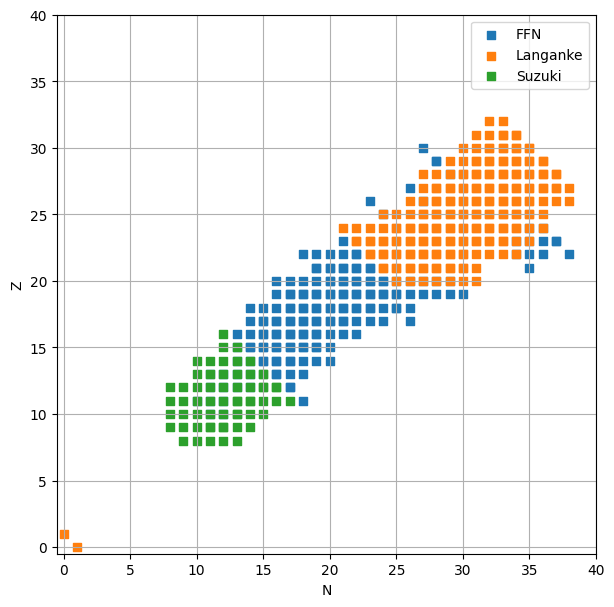

In [7]:
fig, ax = plt.subplots()
ax.scatter([r.reactants[0].N for r in ffn_rates],
           [r.reactants[0].Z for r in ffn_rates], marker="s", color="C0", label="FFN")
ax.scatter([r.reactants[0].N for r in langanke_rates],
           [r.reactants[0].Z for r in langanke_rates], marker="s", color="C1", label="Langanke")
ax.scatter([r.reactants[0].N for r in suzuki_rates],
           [r.reactants[0].Z for r in suzuki_rates], marker="s", color="C2", label="Suzuki")
ax.legend()
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_xlim(-0.5, max_size)
ax.set_ylim(-0.5, max_size)
ax.set_aspect("equal")
ax.grid()
fig.set_size_inches(7, 7)